In [1]:
import nltk
import urllib.request
import matplotlib.pyplot as plt
import spacy
import es_core_news_sm
import operator
import seaborn as sns
import numpy as np

from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

# Clasificacion de Texto

## Funciones

In [2]:
def scraping(url):
    html = urllib.request.urlopen(url).read()
    soup = BeautifulSoup(html,"html.parser")
    return [soup,soup.get_text(strip=True)]

In [3]:
def filtradoAlfabetico(tokens):
    return [word.lower() for word in tokens if word.isalpha() and len(word) > 1 ]

In [4]:
def eliminarPalabrasParada(tokens):
    Tokens_limpios = tokens[:]

    for token in tokens:
        if token in stopwords.words("spanish"):
            Tokens_limpios.remove(token)
    return Tokens_limpios

In [5]:
def lematizarEspaniol(cadena,imprimir = False):
    tokens_limpios_lem = []
    for token in cadena:
        if imprimir:
            print(f'{token.text} - {token.lemma_} - {token.pos_}') 
        tokens_limpios_lem.append(token.lemma_)
    return tokens_limpios_lem

In [6]:
def frecuenciaPalabras(tokens,imprimir = False):
    freq = nltk.FreqDist(tokens)
    if imprimir:
        for palabra,valor in freq.items():
            print(f"{palabra}: {valor}")
    return freq

In [7]:
def vizualizarTokens(tokens,n_words = 30):
    tokens.plot(n_words,cumulative=False)

In [8]:
def vizualizarBarras(x_list,y_list,xlabel="",ylabel=""):
    sns.set_style("whitegrid")
    plt.figure(figsize=(8,6))
    plt.ylabel(xlabel)
    plt.xlabel(ylabel)
    plt.xticks(fontsize=12)
    sns.barplot(x=x_list, y=y_list, palette=["#CFC60E","#0F5F8C","#4C0F8C"])
    plt.show()

#### - Scraping https://aukera.es/blog/web-scraping/

In [9]:
 soup,text = scraping("https://aukera.es/blog/web-scraping/")

In [10]:
tokens = word_tokenize(text,"spanish")

In [11]:
tokens = filtradoAlfabetico(tokens)

In [12]:
Tokens_limpios = eliminarPalabrasParada(tokens)

In [13]:
freq = frecuenciaPalabras(Tokens_limpios,imprimir=False)

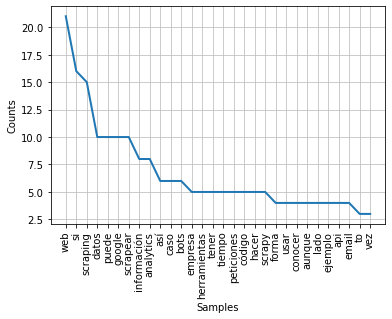

In [14]:
vizualizarTokens(freq)

### - Lematización en Español

In [15]:
nlp = es_core_news_sm.load()#instancia
cadena = (" ".join(Tokens_limpios))#string
cadena = nlp(cadena)

In [16]:
tokens_limpios_lem = lematizarEspaniol(cadena,imprimir = False)

In [17]:
freq_lem = frecuenciaPalabras(tokens_limpios_lem,imprimir = True)

web: 24
scraping: 15
aukeraaukera: 1
conversiónestrategiainicioserviciosanalítica: 1
appmarketing: 1
objetivosformación: 1
to: 3
contentel: 1
blogde: 1
aukeraanalíticatráfico: 1
conversiónestrategiaanalíticaainhoa: 1
twitterfacebooklinkedinqué: 1
scrapingprobablemente: 1
primero: 1
vez: 4
escuchar: 2
términoweb: 1
si: 16
seguro: 2
encontrar: 3
alguno: 4
formar: 6
comodata: 1
rastrear: 2
dato: 10
extracción: 3
datoso: 1
hacer: 14
referenciar: 2
aplicación: 3
concreto: 1
comoprice: 1
consistir: 2
ennavegar: 1
automáticamente: 1
extraer: 4
información: 8
poder: 22
ser: 5
útil: 1
muchísimas: 2
coser: 3
beneficioso: 1
casi: 1
cualquiera: 3
negociar: 2
día: 2
hoy: 1
creer: 2
existir: 3
solo: 4
empresa: 6
éxito: 1
querer: 7
reinar: 1
scrapeo: 3
google: 10
buscador: 1
funcionar: 1
asir: 6
bien: 1
constantemente: 1
scrapeando: 2
red: 2
programar: 2
scrapearse: 1
soler: 1
llamarbot: 1
spider: 1
crawler: 2
mundo: 1
herramienta: 6
ponerlo: 1
punto: 2
queno: 1
requerir: 2
conocimiento: 1
nunca: 1
i

## Resultados

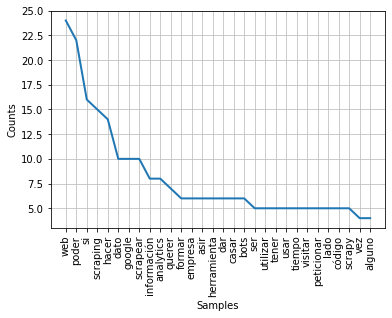

In [18]:
vizualizarTokens(freq_lem)

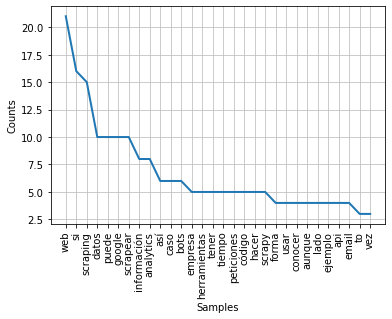

In [19]:
vizualizarTokens(freq)

In [20]:
 print(f"Total, de palabras lematizas: {len(freq_lem)} \nTotal, de palabras No lematizas: { len(freq)}")


Total, de palabras lematizas: 682 
Total, de palabras No lematizas: 789


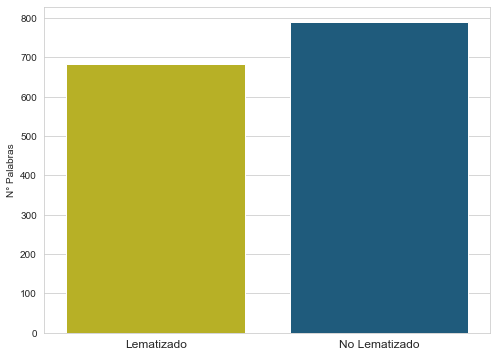

In [21]:
vizualizarBarras(["Lematizado","No Lematizado"],[len(freq_lem),len(freq)],"N° Palabras")

# ETL

## Funciones

In [22]:
def ordenarFrecuencia(freq_lem,imprimir = False):
    wordKeys = []
    items_sort = sorted(freq_lem.items(), key=operator.itemgetter(1), reverse=True)
    for name in enumerate(items_sort):
        if imprimir:
            print(name[1][0], '=', freq_lem[name[1][0]])
        wordKeys.append(name[1][0])
    return wordKeys

In [23]:
def busquedaPorEtiquetaHtml(tagName,length):
    Content = ''
    total = 0
    for tag in soup.find_all(tagName):
        if(len(tag.text) > length):
            text = tag.text[:-1].replace(".",",")
            Content +=text+'.\n\n'
        total +=1
    return [Content,total]

In [24]:
def filtradoEtiquetas(sent_tokens,keys,numero = 3):
    conjunto_palabras = {''}
    corpus = []
    c = 0
    for sent in sent_tokens:
        words = nltk.word_tokenize(sent)
        for w in words:
            if w in keys:
                c += 1
                conjunto_palabras.add(w)     
        if c >= numero:
            corpus.append(sent)
            
        c = 0
    return [corpus,conjunto_palabras]

In [25]:
def frecuenciaEtiquetasHtml(imprimir=False):
    setTag = [x.name for x in soup.find_all(True)]
    return frecuenciaPalabras(setTag,imprimir)

In [26]:
def filtradoPalabras(palabras,filtro):
    return [p for p in palabras if p not in filtro]

In [27]:
def imprimirCorpus(corpus):
    i = 0
    for r in corpus:
        i += 1
        print(f"{i}) {r}",end="\n\n")

## Resultados

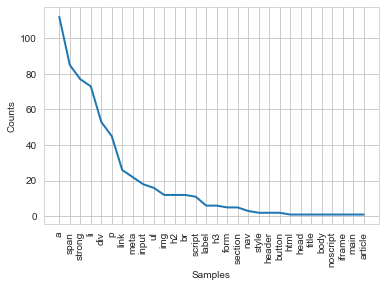

In [28]:
vizualizarTokens(frecuenciaEtiquetasHtml(imprimir=False))

### Etiqueta P

In [29]:
contenido_etiquetas,total_p = busquedaPorEtiquetaHtml('p',length=110)
# print(contenido_etiquetas)

In [30]:
raw_p = contenido_etiquetas.lower()

In [31]:
contenido_sent_tokens_p = nltk.sent_tokenize(raw_p) # convertir Texto a una lista de sentencias (tekenizar en sentencias)

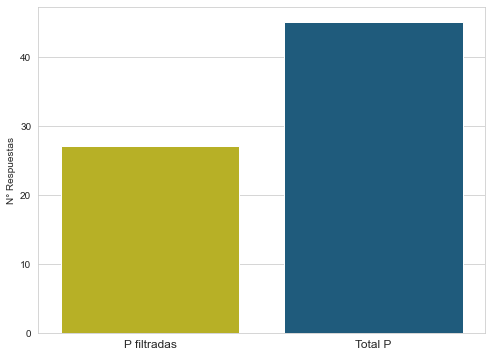

In [32]:
vizualizarBarras(["P filtradas","Total P"],[len(contenido_sent_tokens_p),total_p],"N° Respuestas")

### Etiqueta li

In [33]:
contenido_etiquetas_li,total_li = busquedaPorEtiquetaHtml('li',length=110)

In [34]:
raw_li = contenido_etiquetas_li.lower()

In [35]:
contenido_sent_tokens_li = nltk.sent_tokenize(raw_li)

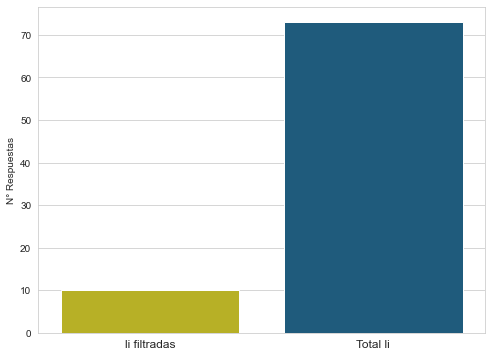

In [36]:
vizualizarBarras(["li filtradas","Total li"],[len(contenido_sent_tokens_li),total_li],"N° Respuestas")

### limpieza de palabras

In [37]:
palabras = ordenarFrecuencia(freq_lem,imprimir=False)

In [38]:
palabras_limpias = filtradoPalabras(palabras,['si','ir','cómo','tener','asir'])[:30]

### Filtrado de las Etiquetas P

In [39]:
corpus_p,palabras_contenidas_p = filtradoEtiquetas(contenido_sent_tokens_p,palabras_limpias,numero=4)

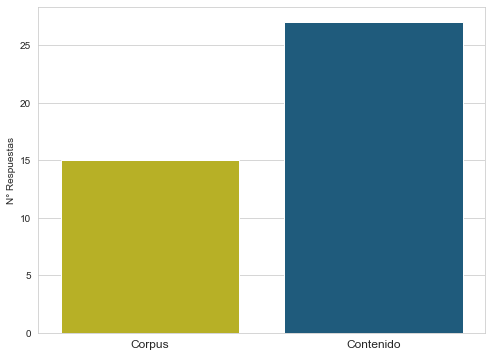

In [40]:
vizualizarBarras(["Corpus","Contenido"],[len(corpus_p),len(contenido_sent_tokens_p)],"N° Respuestas")

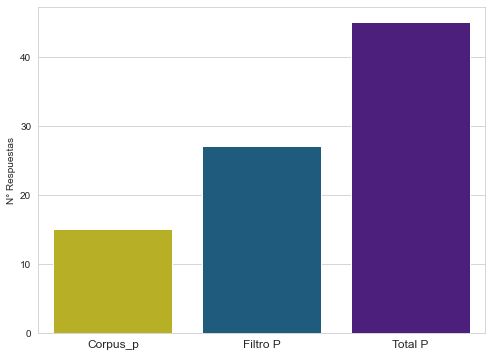

In [41]:
vizualizarBarras(["Corpus_p","Filtro P","Total P"],[len(corpus_p),len(contenido_sent_tokens_p),total_p],"N° Respuestas")

### CORPUS

### Limpieza de corpus

In [42]:
imprimirCorpus(corpus_p)

1) probablemente no sea la primera vez que escuches el término web scraping, y si no, seguro que te lo has encontrado en alguna de sus otras formas, como data scraping, rastreo, scraping de datos, extracción de datos o, haciendo referencia a aplicaciones más concretas, como price mapping.

2) el web scraping consiste en navegar automáticamente una web y extraer de ella información, esto puede ser muy útil para muchísimas cosas y beneficioso para casi cualquier negocio, a día de hoy, no creo que exista una sola empresa de éxito que no lo haga —o que no quiera hacerlo—, de hecho, la empresa reina del scrapeo es google, que para que su buscador funcione así de bien tiene que estar constantemente scrapeando la red entera.

3) imagino que todos habéis escuchado la frase “la información es poder”; pues es muy cierta y scrapear te da información, por tanto, si scrapeas tienes el poder, pero, ¿qué aplicaciones prácticas puede tener?

4) en general, cualquier cosa que necesites consultar en la 

In [43]:
del corpus_p[0]
del corpus_p[1]
del corpus_p[6]

In [44]:
corpus_p[0] = "que es scraping o en que consiste \n" + corpus_p[0]
corpus_p[1] = "automatizar pagina web \n" + corpus_p[1]
corpus_p[2] = "colapsar una pagina web \n" + corpus_p[2]
corpus_p[3] = "problemas de extraccion información \n" + corpus_p[3]
corpus_p[4] = "excluir actividad bots \n" + corpus_p[4]
corpus_p[5] = "bloqueear pagina web \n" + corpus_p[5]
corpus_p[6] = "nombre de las tecnicas de scraping, cuales son las \n" + corpus_p[6]
corpus_p[11] = "terminos y condiciones \n" + corpus_p[11]


In [45]:
# imprimirCorpus(corpus_p)

In [46]:
imprimirCorpus(contenido_sent_tokens_li)

1) agregadores de contenido
es una de las aplicaciones originarias del scraping; al principio, se usó para aglutinar noticias u ofertas inmobiliarias en un único sitio y, posteriormente, se aplicó a innumerables ámbitos, como la información empresarial, los eventos físicos, las ofertas de empleo, etc.

2) reputación online
la masificación de medios como twitter permitió el análisis de sentimiento hacia las marcas en redes sociales, a través de técnicas de data science; gracias al web scraping, podemos extender el estudio del sentimiento a plataformas de reviews, foros especializados, blogs, comentarios en productos y noticias, etc,.

3) caza de tendencias (cool hunting)
el siguiente paso lógico tras el estudio de la reputación online fue la caza de tendencias, es decir, usar el scraping no solo para saber qué se piensa de una marca, sino de qué marcas, productos, personas… se va a estar hablando durante los próximos meses, para aprovechar las oportunidades de marketing.

4) optimizació

In [47]:
del contenido_sent_tokens_li[7]
del contenido_sent_tokens_li[7]
del contenido_sent_tokens_li[7]

In [48]:
# imprimirCorpus(contenido_sent_tokens_li)

In [49]:
corpus = corpus_p + contenido_sent_tokens_li

In [50]:
imprimirCorpus(corpus)

1) que es scraping o en que consiste 
el web scraping consiste en navegar automáticamente una web y extraer de ella información, esto puede ser muy útil para muchísimas cosas y beneficioso para casi cualquier negocio, a día de hoy, no creo que exista una sola empresa de éxito que no lo haga —o que no quiera hacerlo—, de hecho, la empresa reina del scrapeo es google, que para que su buscador funcione así de bien tiene que estar constantemente scrapeando la red entera.

2) automatizar pagina web 
en general, cualquier cosa que necesites consultar en la web y a la que estés dedicando tiempo para hacerlo se puede automatizar, es más, piensa qué información no estás consultando, pero consultarías si tuvieras todo el tiempo del mundo.

3) colapsar una pagina web 
hay que tener en cuenta que, cuando una web se scrapea, se está simulando la visita de un usuario, si el servicio web recibe demasiadas visitas y no le da tiempo de servir a todas, se puede colapsar, por eso hay que andar con pies d

In [51]:
raw_corpus = (" ".join(corpus))

# CHATBOT

In [52]:
import random
import string
import pyttsx3
import speech_recognition as sr

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [53]:
# sent_tokens = nltk.sent_tokenize(raw)
sent_tokens = corpus
word_tokens = nltk.word_tokenize(raw_corpus)
lemmer = nltk.stem.WordNetLemmatizer()

## Configuraciones

#### Procesamiento de Voz

In [54]:
r = sr.Recognizer()
mic = sr.Microphone()

### Sintesis de Voz

In [55]:
engine = pyttsx3.init()
engine.setProperty('rate',150)
engine.setProperty('voice','spanish')

## Funciones

In [56]:
def speak(texto):
    engine.say(texto)
    engine.runAndWait()

In [57]:
remove_punct_dict = dict((ord(punct),None) for punct in string.punctuation) #remover signos de puntuacion (utilizamos la )

def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens] # Lematizar palabras tokenizadas

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [58]:
#Determinar la similutud del texto inserdado y el corpus

RESPUESTAS_OUTPUTS = ["Lo siento, no te entendido, pudes repetir","Esta bien, no te entendi, me podrias repetir","Disculpa, puedes tepetir"]

def response(user_response):# funcion respuesta (entrada: mensje de usuario)
    chatbot_response = '' #definir la respuesta del chatbot
    sent_tokens.append(user_response)# al listado de sentencias del corpus añadir al final de la lista el mensaje del usuario
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize,stop_words=stopwords.words('spanish'))# Lematizar y eliminar palbras
    tfidf = TfidfVec.fit_transform(sent_tokens)

    # 3 Evaluar similitud coseno entre mensaje usuario (tfid[-1]) y el corpus(tfidf)
    vals = cosine_similarity(tfidf[-1],tfidf)
    idx = vals.argsort()[0][-2]
    flat = vals.flatten()
    flat.sort()
    req_tfidf = flat[-2]

    if(req_tfidf == 0):
        chatbot_response = chatbot_response + random.choice(RESPUESTAS_OUTPUTS)
        return chatbot_response
    
    else:
        chatbot_response = chatbot_response + sent_tokens[idx]
        return chatbot_response

In [59]:
SALUDOS_INPUTS = ("hola","buenas","saludos","que tal","hey","buenos dias")
SALUDOS_OUTPUTS = ["Genial que estes aqui.","hola, que bueno que estes aqui.","hola, que tal?","Hola, Como te puedo ayudar?","hola, encantado de hablar contigo"]

def saludos(sentence):
    for word in sentence.split():
        # print(word.lower() in SALUDOS_INPUTS)
        if word.lower() in SALUDOS_INPUTS:
            return random.choice(SALUDOS_OUTPUTS)

In [60]:
def speakAgent(msg):
    print("Roxanne:> ",msg)
    speak(msg)

In [61]:
RESPUETA_CHAT = ["Por favor, escribame la pregunta, gracias", "Muy bien, estare atenta a lo que me escribas","Si tienes alguna duda, cuenta conmigo, dime cual es tu pregunta"]
def chat_escrito(): 
    speakAgent(random.choice(RESPUETA_CHAT))
    user_response = input()
    print("usuario:> ",user_response)
    return user_response.lower()

In [62]:
RESPUETA_VOZ = ["Dime, cual es tu duda?", "Encantada de responderte, dima en que puedo ayudarte?","Estoy lista para responderte, dime cual es tu duda."]
def chat_voz():
    speak(random.choice(RESPUETA_VOZ))
    with sr.Microphone() as source:
        r.adjust_for_ambient_noise(source)
        audio = r.listen(source)
        try:
            text = r.recognize_google(audio, language='es',show_all=True)
            entrada = text['alternative'][0]['transcript']
            print("usuario:> ",entrada)
        except:
            entrada = ' '
    return entrada.lower()

In [63]:

def chatBots():
    flag = True
    mode = True
    chat = True
    speakAgent("MI NOMBRE ES ROXANNE")
    while(mode == True):
        
        speakAgent("Si deseas preguntarme por voz, por favor digita, si, de lo contrario te respondere de lo que me escribes en el formulario, Gracias.")
        res = input()
        
        if res.lower() in ["si","ok","y"]:
            print(res)
            chat = False
            mode = False
        elif res.lower() in ["no","not"]:
            mode = False

    while(flag == True):

        if chat:     
            user_response = chat_escrito()
        else:
            user_response = chat_voz()
            
        if(user_response not in ["salir","chao","adios","bay","exit"]):
            if(user_response == 'gracias' or user_response == 'muchas gracias'): #se podria haber definido otra funcion de coincidencia
                flag = True
                speakAgent("No hay de qué")
            else:
                if(saludos(user_response) != None): # si la palabra insertada por el usuario es un saludo (coincidencia manuales)
                    greets = saludos(user_response) 
                    speakAgent(greets)

                else:#si la palabra insertada no es un saludo --> Corpus
                    respond = response(user_response)
                    speakAgent(respond)
                    sent_tokens.remove(user_response) # para eliminar del corpus la respues del usuario y volver a evaluar 
        else:
            flag = False
            speakAgent("Nos vemos pronto, !Gracias por su visita¡") 

In [64]:
chatBots()

Roxanne:>  MI NOMBRE ES ROXANNE
Roxanne:>  Si deseas preguntarme por voz, por favor digita, si, de lo contrario te respondere de lo que me escribes en el formulario, Gracias.
si
usuario:>  chao
Roxanne:>  Nos vemos pronto, !Gracias por su visita¡


In [65]:
imprimirCorpus(corpus)

1) que es scraping o en que consiste 
el web scraping consiste en navegar automáticamente una web y extraer de ella información, esto puede ser muy útil para muchísimas cosas y beneficioso para casi cualquier negocio, a día de hoy, no creo que exista una sola empresa de éxito que no lo haga —o que no quiera hacerlo—, de hecho, la empresa reina del scrapeo es google, que para que su buscador funcione así de bien tiene que estar constantemente scrapeando la red entera.

2) automatizar pagina web 
en general, cualquier cosa que necesites consultar en la web y a la que estés dedicando tiempo para hacerlo se puede automatizar, es más, piensa qué información no estás consultando, pero consultarías si tuvieras todo el tiempo del mundo.

3) colapsar una pagina web 
hay que tener en cuenta que, cuando una web se scrapea, se está simulando la visita de un usuario, si el servicio web recibe demasiadas visitas y no le da tiempo de servir a todas, se puede colapsar, por eso hay que andar con pies d